<a href="https://colab.research.google.com/github/gabrieldimas/periapical-photo-caries-detection-using-cnn/blob/main/caries_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install roboflow torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from roboflow import Roboflow

rf = Roboflow(api_key="qGaBcdFPu8o5nVzk6TVH")
project = rf.workspace("gabriels").project("tooth-segmentation-ra8um")
model = project.version(3).model

loading Roboflow workspace...
loading Roboflow project...


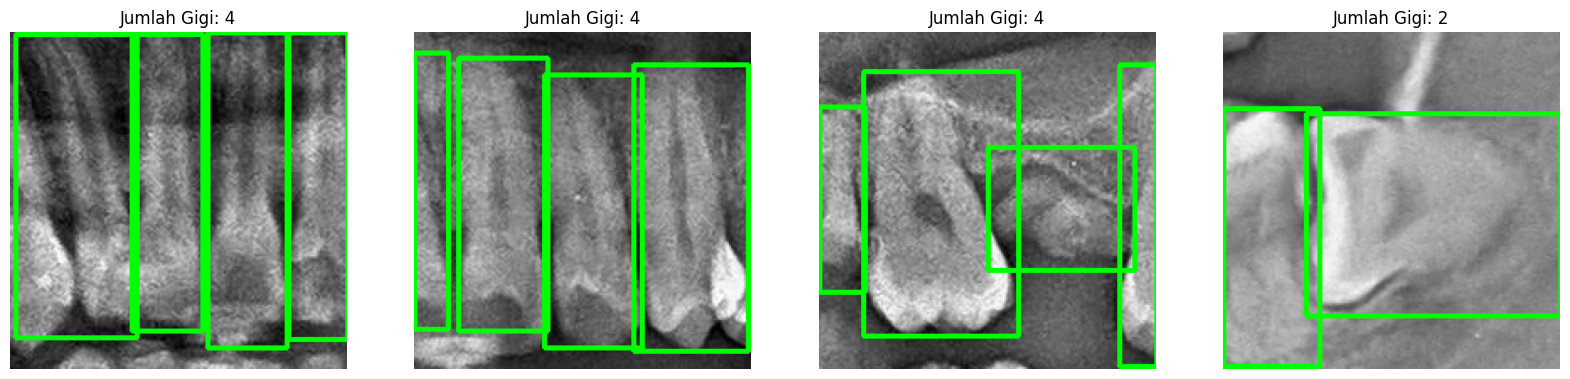

In [20]:
import os
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

image_folder = '/content/drive/MyDrive/dataset/caries-detection/periapical'

segmented_images = []

for filename in os.listdir(image_folder):
  image_path = os.path.join(image_folder, filename)
  result = model.predict(image_path)
  image = Image.open(image_path)

  image_np = np.array(image)
  image_cv = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)
  num_teeth = len(result.json()['predictions'])

  for box in result.json()['predictions']:
      x1 = int(box['x'] - box['width'] / 2)
      y1 = int(box['y'] - box['height'] / 2)
      x2 = int(box['x'] + box['width'] / 2)
      y2 = int(box['y'] + box['height'] / 2)
      cv2.rectangle(image_cv, (x1, y1), (x2, y2), (0, 255, 0), 2)

  segmented_images.append((image_cv, num_teeth))

selected_images = random.sample(segmented_images, 4)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, (image_cv, num_teeth) in enumerate(selected_images):
    axes[i].imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))
    axes[i].set_title(f"Jumlah Gigi: {num_teeth}")
    axes[i].axis('off')

plt.show()